In [2]:
pip install seaborn

     |████████████████████████████████| 292 kB 18.3 MB/s            
Note: you may need to restart the kernel to use updated packages.


   Age  Income  Shopping_Score Spending_Category
0   56   81228              68            Medium
1   69   68984              41            Medium
2   46   60774              97            Medium
3   32   22568              61            Medium
4   60   82592              71              High
Model Accuracy: 90.00%


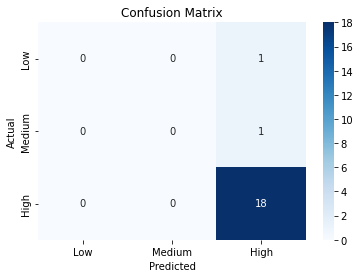

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset from CSV
df = pd.read_csv("customer_data.csv")  # Ensure the CSV file is in the same directory

# Display first few rows of data
print(df.head())

# Encode categorical target variable (High = 2, Medium = 1, Low = 0)
label_encoder = LabelEncoder()
df["Spending_Category"] = label_encoder.fit_transform(df["Spending_Category"])

# Separate features (X) and target (y)
X = df.drop(columns=["Spending_Category"])  # Features (Age, Income, Shopping Score)
y = df["Spending_Category"]  # Target (0 = Low, 1 = Medium, 2 = High)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better accuracy
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a k-NN model (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=["Low","Medium","High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()